In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv
df = pd.read_csv('NVDA.csv')
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df.set_index('Date', inplace=True)
df_resampled = df.resample('M').mean()

# Read trend csv
trend = pd.read_csv('TREND.csv')
trend['Month'] = pd.to_datetime(trend['Month'],utc=True)
trend.set_index('Month', inplace=True)
for col in trend.columns:
    trend[col] = trend[col].astype(str).str.replace('<1','1').astype(float)

,nvidia: (United States),NASDAQ:NVDA: (United States),Nvidia: (United States)
Month,,,
2004-01-01 00:00:00+00:00,86.0,1.0,89.0
2004-02-01 00:00:00+00:00,75.0,1.0,83.0
2004-03-01 00:00:00+00:00,79.0,1.0,85.0
2004-04-01 00:00:00+00:00,73.0,1.0,87.0
2004-05-01 00:00:00+00:00,80.0,1.0,81.0


In [57]:
# Get rate of change of trend monthly
trend_rate = trend.pct_change()
trend_rate

# Get rate of change of stock monthly
df_resampled_rate = pd.DataFrame(df_resampled['Close'].pct_change())
df_resampled_rate

# Need to get rid of outlier rate of change

,Close
Date,
2004-01-31 00:00:00+00:00,NaN
2004-02-29 00:00:00+00:00,-0.042156
2004-03-31 00:00:00+00:00,-0.017258
2004-04-30 00:00:00+00:00,0.068485
2004-05-31 00:00:00+00:00,-0.103371
...,...
2023-10-31 00:00:00+00:00,-0.015538
2023-11-30 00:00:00+00:00,0.089292
2023-12-31 00:00:00+00:00,0.011421


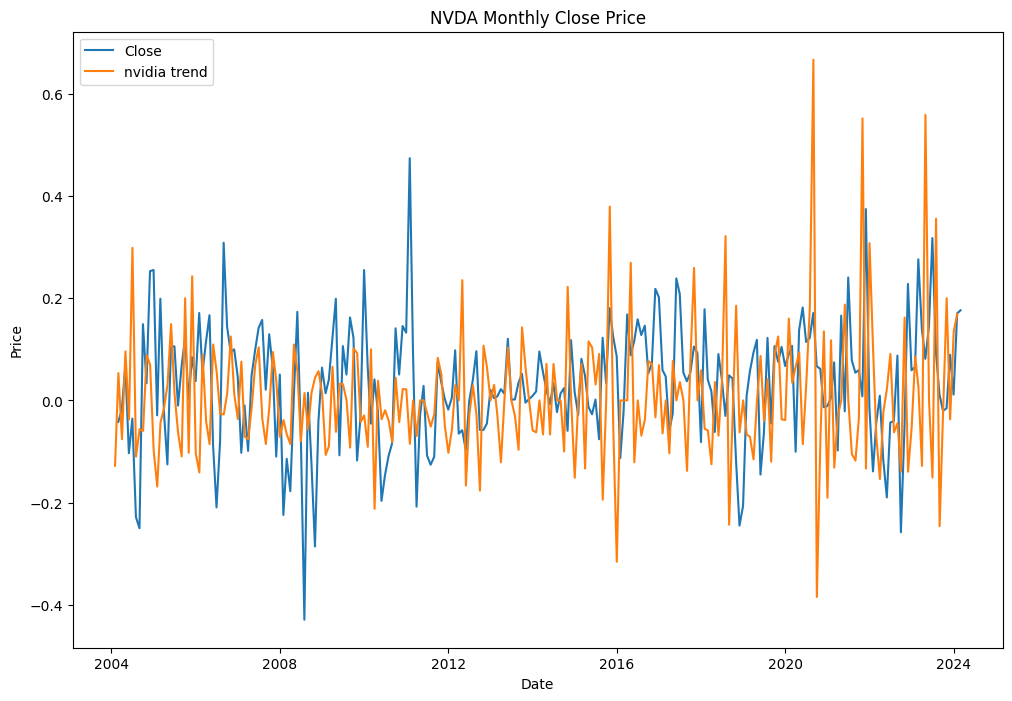

In [68]:
# Plot the data
plt.figure(figsize=(12,8))
plt.plot(df_resampled_rate, label='Close')
plt.plot(trend_rate['nvidia: (United States)'], label='nvidia trend')
# plt.plot(trend_rate['NASDAQ:NVDA: (United States)'], label='NVDA trend')
# plt.plot(trend_rate['Nvidia: (United States)'], label='Nvidia trend')
plt.title('NVDA Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()